In [1]:
import os
import pandas as pd
%matplotlib inline

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [4]:
from newsapi import NewsApiClient

# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q="Bitcoin", language="en", sort_by="relevancy")
bitcoin_news["articles"][-1]

{'source': {'id': 'the-next-web', 'name': 'The Next Web'},
 'author': 'Satoshi Nakaboto',
 'title': 'Satoshi Nakaboto: ‘Nouriel Roubini says Bitcoin is a total scam — again’',
 'description': 'Our robot colleague Satoshi Nakaboto writes about Bitcoin every fucking day. Welcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you what’s been going on with Bitcoin in the past 24 hours. As Pasteur used to say: Fight the power! Bitc…',
 'url': 'https://thenextweb.com/hardfork/2020/05/11/satoshi-nakaboto-nouriel-roubini-says-bitcoin-is-a-total-scam-again/',
 'urlToImage': 'https://img-cdn.tnwcdn.com/image/hardfork?filter_last=1&fit=1280%2C640&url=https%3A%2F%2Fcdn0.tnwcdn.com%2Fwp-content%2Fblogs.dir%2F1%2Ffiles%2F2019%2F08%2Fbitcoin_today-header_bitcoin_today.jpg&signature=30221b6a68049cc6bc3b58f3ddb38864',
 'publishedAt': '2020-05-11T08:43:32Z',
 'content': 'Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition o

In [6]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q="Ethereum", language="en", sort_by="relevancy")
ethereum_news["articles"][0]

{'source': {'id': 'the-next-web', 'name': 'The Next Web'},
 'author': 'Satoshi Nakaboto',
 'title': 'Satoshi Nakaboto: ‘Daily Ethereum network fees surpass Bitcoin’s’',
 'description': 'Our robot colleague Satoshi Nakaboto writes about Bitcoin every fucking day. Welcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you what’s been going on with Bitcoin in the past 24 hours. As Schopenhauer used to say: Do what you love…',
 'url': 'https://thenextweb.com/hardfork/2020/06/08/satoshi-nakaboto-daily-ethereum-network-fees-surpass-bitcoins/',
 'urlToImage': 'https://img-cdn.tnwcdn.com/image/hardfork?filter_last=1&fit=1280%2C640&url=https%3A%2F%2Fcdn0.tnwcdn.com%2Fwp-content%2Fblogs.dir%2F1%2Ffiles%2F2019%2F08%2Fbitcoin_today-header_bitcoin_today.jpg&signature=30221b6a68049cc6bc3b58f3ddb38864',
 'publishedAt': '2020-06-08T08:38:44Z',
 'content': 'Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Tod

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,compound,negative,neutral,positive,text
0,0.7650,0.000,0.829,0.171,J.K. Rowling has been drinking a lot and you'd...
1,0.0000,0.000,1.000,0.000,The Winklevoss twinsthe brothers Mark Zuckerbe...
2,0.0000,0.000,1.000,0.000,Over the last few weeks all eyes in the crypto...
3,-0.3464,0.134,0.819,0.046,If youre planning to do some protesting and yo...
4,-0.5859,0.134,0.866,0.000,Since the first Bitcoin block was generated ba...


In [8]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,compound,negative,neutral,positive,text
0,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...
1,0.0000,0.000,1.000,0.000,Editors note:Andreessen Horowitzs Crypto Start...
2,0.0000,0.000,1.000,0.000,For developers looking to quickly build identi...
3,0.6249,0.000,0.859,0.141,Use this to send Ether from one account to ano...
4,-0.4457,0.086,0.882,0.031,"Some open-source groups, such as The Linux Fou..."


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,negative,neutral,positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.244663,0.021895,0.911842,0.066158
std,0.409451,0.045818,0.057773,0.056865
min,-0.585900,0.000000,0.812000,0.000000
25%,0.000000,0.000000,0.894500,0.000000
50%,0.507000,0.000000,0.910000,0.090000
75%,0.507000,0.000000,0.920000,0.090000
max,0.801600,0.134000,1.000000,0.188000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,negative,neutral,positive
count,15.000000,15.000000,15.000000,15.000000
mean,0.274887,0.018933,0.897400,0.083533
std,0.347588,0.043444,0.100329,0.085977
min,-0.445700,0.000000,0.665000,0.000000
25%,0.000000,0.000000,0.871500,0.015500
50%,0.318200,0.000000,0.910000,0.089000
75%,0.507000,0.000000,0.971500,0.102500
max,0.919800,0.148000,1.000000,0.335000


### Questions:

##### Q: Which coin had the highest mean positive score?

A: **Ethereum** coin had the highest mean positive score .084 when compared to Bitcoin's score of .066

##### Q: Which coin had the highest compound score?

A: **Ethereum** again had the highest mean compound score of .275 when compared to Bitcoin's .245 score

##### Q. Which coin had the highest positive score?

A: **Ethereum** once again comes in first having a higher positive score of .335 and Bitcoin just .188 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Expand the default stopwords list if necessary
sw_addon = {'said', 'mln', 'kilolitres','kl', 'ha', 'ho', 'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'}

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    
    return tokens

In [14]:
# Create a new tokens column for bitcoin
bitcoin_df['Tokens'] = [tokenizer(x) for x in bitcoin_df['text']]
bitcoin_df.head()

,compound,negative,neutral,positive,text,Tokens
0,0.7650,0.000,0.829,0.171,J.K. Rowling has been drinking a lot and you'd...,"[jk, rowling, drinking, lot, youd, better, bel..."
1,0.0000,0.000,1.000,0.000,The Winklevoss twinsthe brothers Mark Zuckerbe...,"[winklevoss, twinsthe, brother, mark, zuckerbe..."
2,0.0000,0.000,1.000,0.000,Over the last few weeks all eyes in the crypto...,"[last, eye, crypto, world, glued, halvening, n..."
3,-0.3464,0.134,0.819,0.046,If youre planning to do some protesting and yo...,"[youre, planning, protesting, dont, want, risk..."
4,-0.5859,0.134,0.866,0.000,Since the first Bitcoin block was generated ba...,"[since, first, bitcoin, block, wa, generated, ..."


In [15]:
# Create a new tokens column for ethereum
ethereum_df['Tokens'] = [tokenizer(y) for y in ethereum_df['text']]
ethereum_df.head()

,compound,negative,neutral,positive,text,Tokens
0,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
1,0.0000,0.000,1.000,0.000,Editors note:Andreessen Horowitzs Crypto Start...,"[editors, noteandreessen, horowitzs, crypto, s..."
2,0.0000,0.000,1.000,0.000,For developers looking to quickly build identi...,"[developer, looking, quickly, build, identity,..."
3,0.6249,0.000,0.859,0.141,Use this to send Ether from one account to ano...,"[use, send, ether, one, account, another, smar..."
4,-0.4457,0.086,0.882,0.031,"Some open-source groups, such as The Linux Fou...","[opensource, group, linux, foundation, deal, o..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
btc_tokens = [btc for bits in bitcoin_df.Tokens for btc in bits]
bigram_counts = Counter(ngrams(btc_tokens, n=2))
bigram_counts.most_common(20)

[(('satoshi', 'nakaboto'), 18),
 (('char', 'robot'), 9),
 (('robot', 'colleague'), 9),
 (('colleague', 'satoshi'), 9),
 (('nakaboto', 'writes'), 9),
 (('writes', 'bitcoin'), 9),
 (('every', 'fucking'), 9),
 (('fucking', 'daywelcome'), 9),
 (('daywelcome', 'another'), 9),
 (('another', 'edition'), 9),
 (('edition', 'bitcoin'), 9),
 (('bitcoin', 'satoshi'), 9),
 (('nakaboto', 'tell'), 9),
 (('tell', 'whats'), 9),
 (('whats', 'going'), 9),
 (('going', 'bitcoin'), 9),
 (('bitcoin', 'char'), 9),
 (('bitcoin', 'btc'), 8),
 (('btc', 'every'), 8),
 (('year', 'bitcoin'), 2)]

In [18]:
# Generate the Ethereum N-grams where N=2
eth_tokens = [eth for eths in ethereum_df.Tokens for eth in eths]
bigram_counts = Counter(ngrams(eth_tokens, n=2))
bigram_counts.most_common(20)

[(('satoshi', 'nakaboto'), 6),
 (('robot', 'colleague'), 3),
 (('colleague', 'satoshi'), 3),
 (('nakaboto', 'writes'), 3),
 (('writes', 'bitcoin'), 3),
 (('bitcoin', 'btc'), 3),
 (('btc', 'every'), 3),
 (('every', 'fucking'), 3),
 (('fucking', 'daywelcome'), 3),
 (('daywelcome', 'another'), 3),
 (('another', 'edition'), 3),
 (('edition', 'bitcoin'), 3),
 (('bitcoin', 'satoshi'), 3),
 (('nakaboto', 'tell'), 3),
 (('tell', 'whats'), 3),
 (('whats', 'going'), 3),
 (('going', 'bitcoin'), 3),
 (('bitcoin', 'char'), 3),
 (('open', 'source'), 2),
 (('char', 'robot'), 2)]

In [19]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    
    # Combine all articles in corpus into one large string
    big_string = ' '.join(tokens)
    processed = tokenizer(big_string)
    top_10 = dict(Counter(processed).most_common(10))
    
    return Counter(tokens).most_common(N)

In [20]:
# Get the top 10 words for Bitcoin
token_count(btc_tokens)

[('bitcoin', 36),
 ('char', 19),
 ('satoshi', 18),
 ('nakaboto', 18),
 ('every', 12),
 ('another', 10),
 ('robot', 9),
 ('colleague', 9),
 ('writes', 9),
 ('fucking', 9)]

In [21]:
# Get the top 10 words for Ethereum
token_count(eth_tokens)

[('char', 15),
 ('bitcoin', 12),
 ('satoshi', 6),
 ('nakaboto', 6),
 ('crypto', 5),
 ('every', 4),
 ('another', 4),
 ('blockchain', 4),
 ('robot', 3),
 ('colleague', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

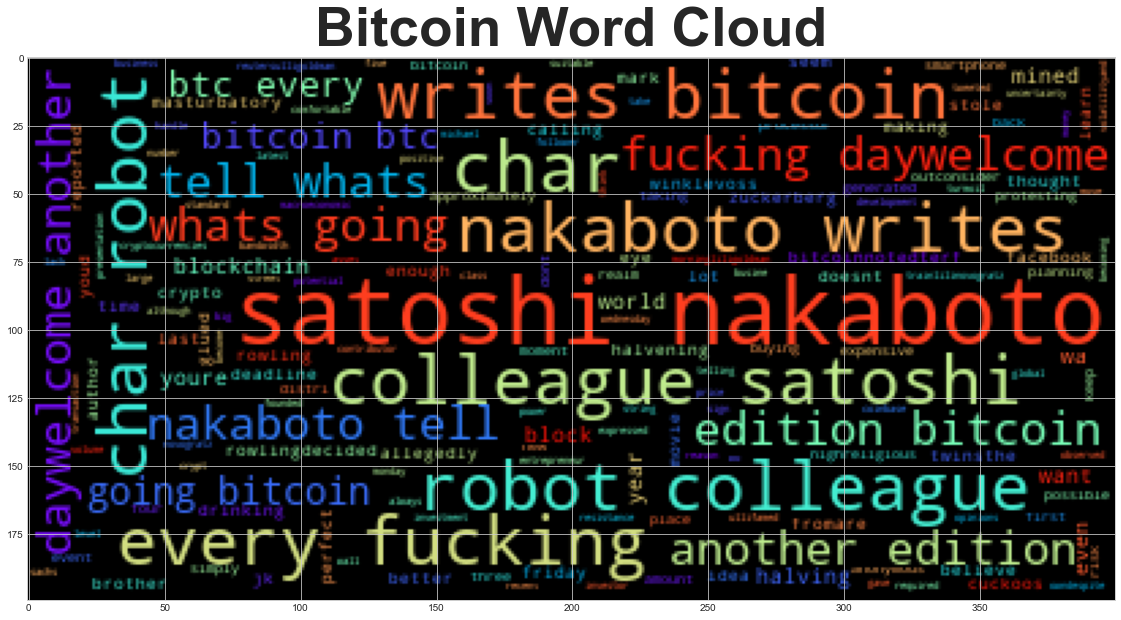

In [23]:
# Generate the Bitcoin word cloud
big_string = ' '.join([btc for bits in bitcoin_df.Tokens for btc in bits])
wc = WordCloud(colormap="rainbow").generate(big_string)
plt.title("Bitcoin Word Cloud", {"fontsize":55, "fontweight": "bold"})
plt.imshow(wc)

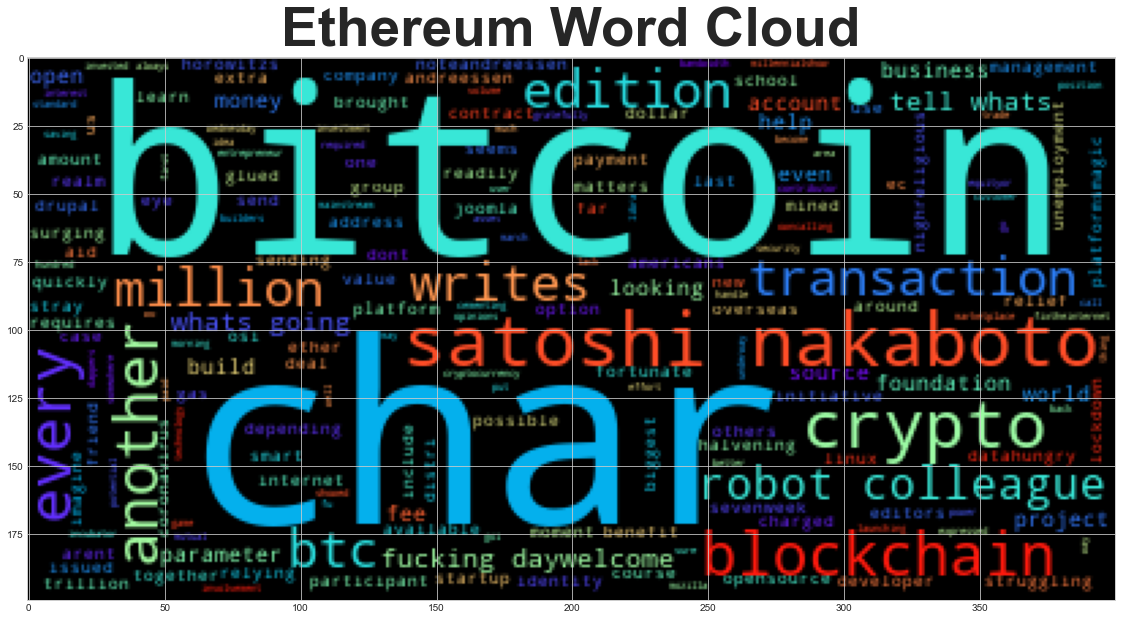

In [24]:
# Generate the Ethereum word cloud
big_string = ' '.join([eth for ets in ethereum_df.Tokens for eth in ets])
wc = WordCloud(colormap="rainbow").generate(big_string)
plt.title("Ethereum Word Cloud", {"fontsize":55, "fontweight": "bold"})
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [28]:
# Concatenate all of the bitcoin text together    (must be in this format for the nlp to work)
btc_all_corpus = bitcoin_df.text.sum()
btc_all_corpus

'J.K. Rowling has been drinking a lot and you\'d better believe she has some thoughts on Bitcoin.\r\nNotedTERF and author of The Cuckoos Calling, Rowlingdecided Friday was the perfect time to learn about… [+2124 chars]The Winklevoss twinsthe brothers Mark Zuckerberg allegedly stole the idea for Facebook fromare making a movie about themselves, Deadline reported this week. If that doesnt seem masturbatory enough, r… [+2657 chars]Over the last few weeks all eyes in the crypto world have been glued to the halvening, a nigh-religious moment in the blockchain realm. Every once in a while, the amount of new bitcoin mined — distri… [+4849 chars]If youre planning to do some protesting and you dont want to risk your expensive smartphone in the processor you simply want to keep yourself as anonymous as possible while youre outconsider buying a… [+5568 chars]Since the first Bitcoin block was generated back in 2009, there have been three halving events. Taking place once every 210,000 blocks mined

In [29]:
# Run the NER processor on all of the text
doc = nlp(btc_all_corpus)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [30]:
# Render the visualization
displacy.render(doc, style='ent')

In [31]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

J.K. Rowling PERSON
Bitcoin GPE
The Cuckoos Calling WORK_OF_ART
Friday DATE
chars]The Winklevoss ORG
Mark Zuckerberg PERSON
Facebook ORG
Deadline PERSON
this week DATE
+2657 ORG
the last few weeks DATE
blockchain GPE
new bitcoin LOC
first ORDINAL
Bitcoin GPE
2009 DATE
three CARDINAL
210,000 CARDINAL
every four years DATE
Bitcoin GPE
Goldman Sachs ORG
five CARDINAL
bitcoin GPE
Wednesday DATE
Goldman ORG
Michael Novogratz PERSON
Monday DATE
bitcoin GPE
$10,000 resistance MONEY
Novogratz PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
bitcoin GPE
2012 DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
+3041 GPE
2020 DATE
a big year DATE
Bitcoin GPE
Bitcoin PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bi

---

## Ethereum NER

In [32]:
# Concatenate all of the bitcoin text together
eth_all_corpus = ethereum_df.text.sum()
eth_all_corpus

'Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats been going on with Bitcoin in … [+3095 chars]Editors note:Andreessen Horowitzs Crypto Startup School brought together 45 participants from around the U.S. and overseas in a seven-week course to learn how to build crypto companies. Andreessen Ho… [+2503 chars]For developers looking to quickly build identity management into their platforms, the most readily available options don’t stray far from the internet’s biggest, most data-hungry platforms.\r\nMagic, a… [+2450 chars]Use this to send Ether from one account to another or a smart contract address. It requires a few parameters depending on the transaction. Possible parameters include from, to, value, gas, and more.\r… [+206 chars]Some open-source groups, such as The Linux Foundation, can deal with it. Others aren\'t so fortunate. Some, such as Drupal Foundation, the 

In [33]:
# Run the NER processor on all of the text
doc1 = nlp(eth_all_corpus)

# Add a title to the document
doc1.user_data["title"] = "Ethereum NER"


In [34]:
# Render the visualization
displacy.render(doc1, style='ent')

In [35]:
# List all Entities
for ent in doc1.ents:
    print(ent.text, ent.label_)

Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Andreessen Horowitzs Crypto Startup School ORG
45 CARDINAL
U.S. GPE
seven-week DATE
Andreessen Ho PERSON
Ether PERSON
The Linux Foundation ORG
Drupal Foundation ORG
OSI ORG
millions CARDINAL
Americans NORP
$2 trillion dollar MONEY
Relief ORG
Ec ORG
the last few weeks DATE
blockchain GPE
new bitcoin LOC
133 MONEY
$2.5 million MONEY
$2.5 million MONEY
Wednesday DATE
morning TIME
Dapper ORG
Libra GPE
March DATE
1500 CARDINAL
well over a hundred CARDINAL
the Mozilla Builders Incubator ORG
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin PERSON
first ORDINAL
blockchain GPE
